In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [115]:
Data = {"x":[25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
       "y":[79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]}

df = pd.DataFrame(Data, columns = ["x","y"])
print(df)

     x   y
0   25  79
1   34  51
2   22  53
3   27  78
4   33  59
5   33  74
6   31  73
7   22  57
8   35  69
9   34  75
10  67  51
11  54  32
12  57  40
13  43  47
14  50  53
15  57  36
16  59  35
17  52  58
18  65  59
19  47  50
20  49  25
21  48  20
22  35  14
23  33  12
24  44  20
25  45   5
26  38  29
27  43  27
28  51   8
29  46   7


<IPython.core.display.Javascript object>


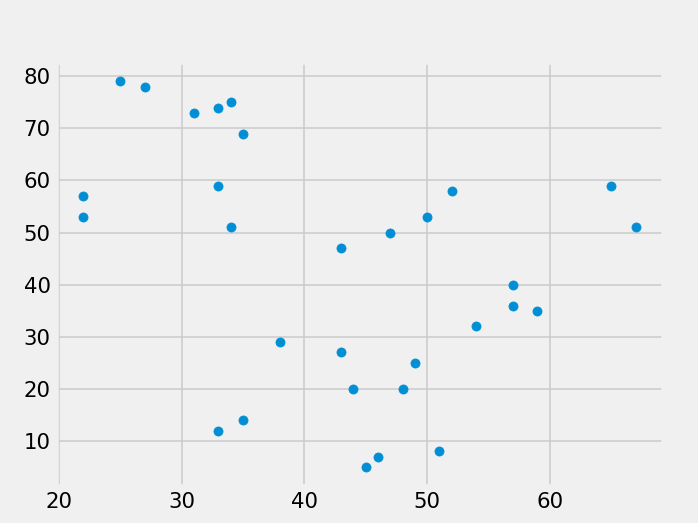

In [224]:
%matplotlib qt
plt.scatter(df["x"], df["y"])

In [117]:
kmeans_set = {"init" : "random", "n_init": 10, "max_iter": 300, "random_state": 42}

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [119]:
from sklearn.cluster import KMeans

List = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_set)  #  ** open dictionary
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)

<IPython.core.display.Javascript object>


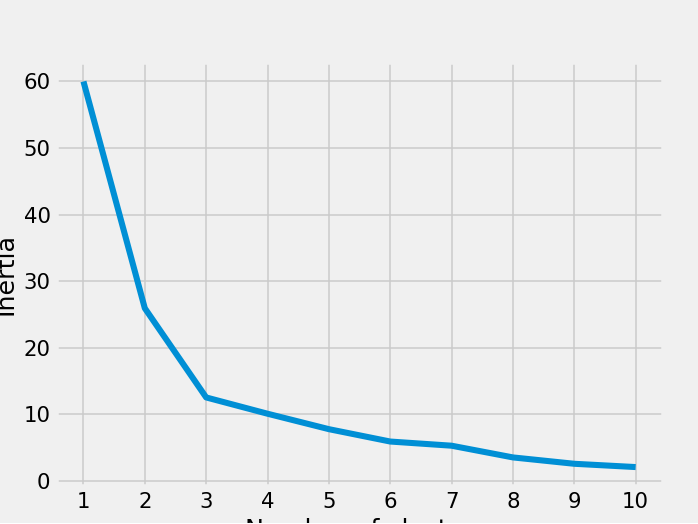

In [225]:
#%matplotlib notebook
%matplotlib qt
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), List)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

In [139]:
!pip install kneed

In [122]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), List, curve = "convex", direction = "decreasing")
k1.elbow

3

<IPython.core.display.Javascript object>


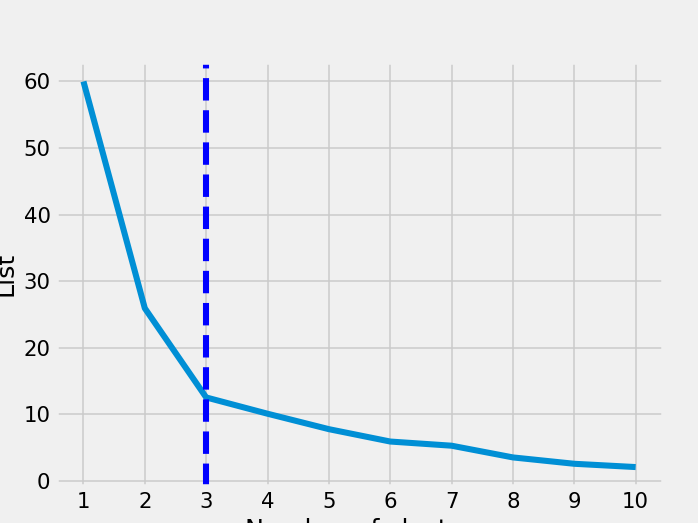

In [226]:
%matplotlib qt
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), List)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("List")
plt.axvline(x = k1.elbow, color = "b", label = "axvline - full height", ls = '--')
plt.show()

[[43.2 16.7]
 [29.6 66.8]
 [55.1 46.1]]


<IPython.core.display.Javascript object>


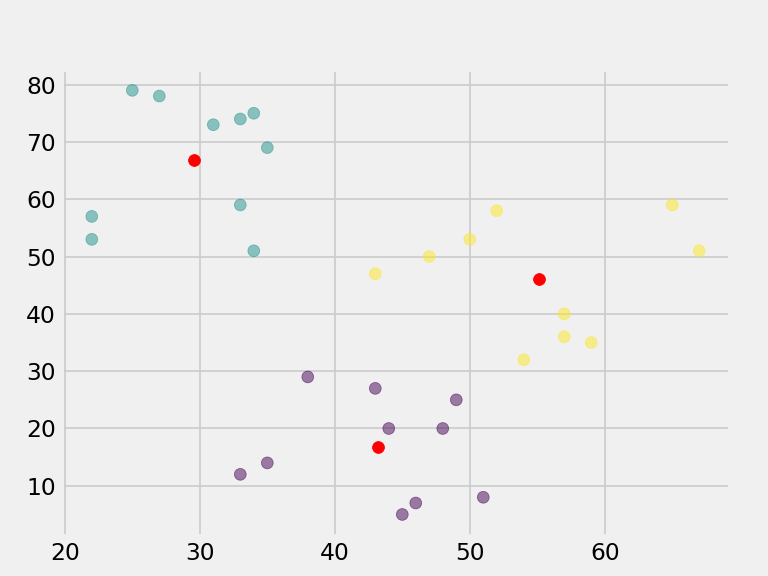

In [142]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

%matplotlib notebook
plt.scatter(df["x"], df["y"], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroids[:,0], centroids[:,1], c = "red", s = 50)
plt.show()

In [125]:
kmeans.cluster_centers_

array([[29.6, 66.8],
       [43.2, 16.7],
       [55.1, 46.1]])

In [126]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, **kmeans_set)  #  ** open dictionary
    kmeans.fit(scaled_features)
    score = silhouette_score (scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)



<IPython.core.display.Javascript object>


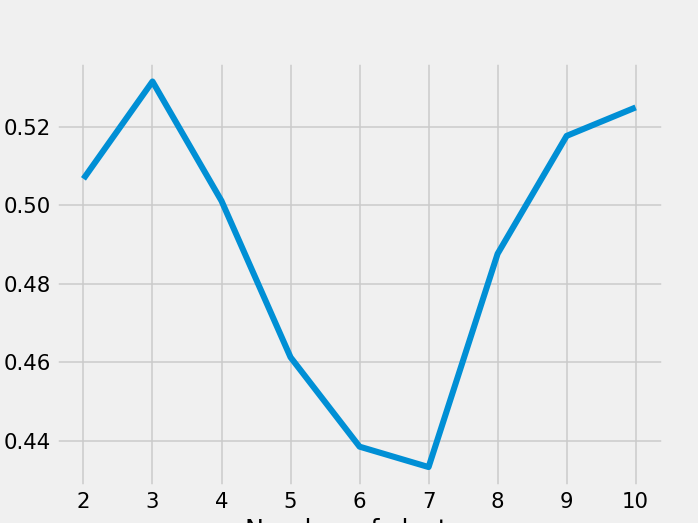

In [227]:
%matplotlib notebook
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette_coefficients")
plt.show()

[[30.83333333 74.66666667]
 [43.2        16.7       ]
 [55.1        46.1       ]
 [27.75       55.        ]]


<IPython.core.display.Javascript object>


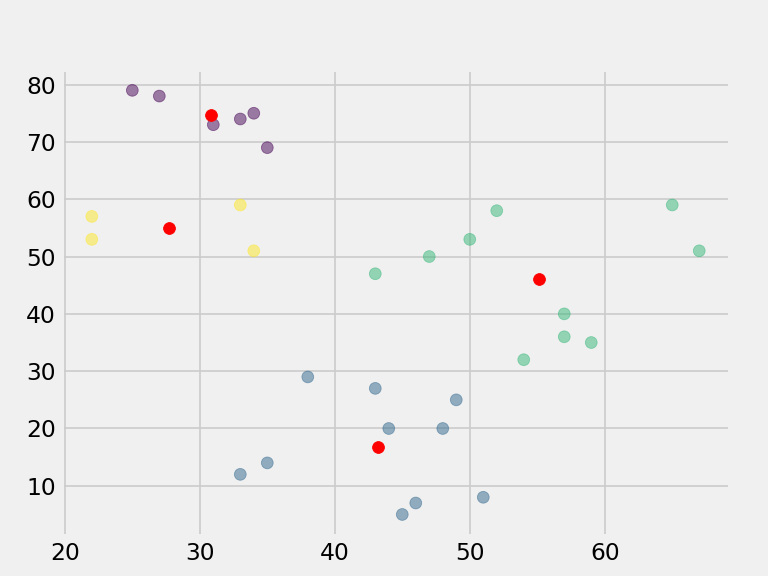

In [145]:

kmeans = KMeans(n_clusters = 4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

%matplotlib notebook
plt.scatter(df["x"], df["y"], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroids[:,0], centroids[:,1], c = "red", s = 50)
plt.show()

<IPython.core.display.Javascript object>


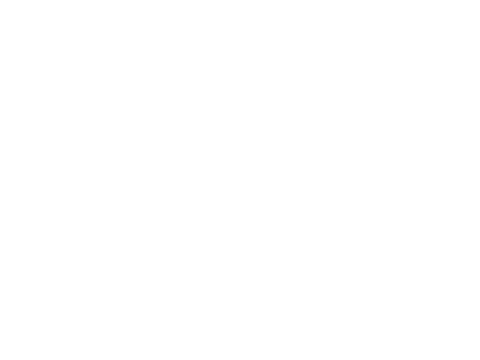

In [150]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

kmeans = KMeans(n_clusters = 3).fit(df)
centroids = kmeans.cluster_centers_

root = tk.Tk()

canvas1 = tk.Canvas(root, width = 100, height = 100)
canvas1.pack()

label1 = tk.Label(root, text = centroids, justify = "center")
canvas1.create_window(70, 50, window = label1)

figure1 = plt.figure(figsize = (4,3), dpi = 100)
ax1 = figure1.add_subplot(111)
ax1.scatter(df["x"], df["y"], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
ax1.scatter(centroids[:,0], centroids[:,1], c = "red", s = 50)
scatter1 = FigureCanvasTkAgg(figure1, root)
scatter1.get_tk_widget().pack(side = tk.RIGHT, fill = tk.BOTH)

root.mainloop()


import tkinter as tk
from tkinter import filedialog
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

kmeans = KMeans(n_clusters = 3).fit(df)
centroids = kmeans.cluster_centers_

root = tk.Tk()

canvas1 = tk.Canvas(root, width = 100, height = 100)
canvas1.pack()

label1 = tk.Label(root, text = centroids, justify = "center")
canvas1.create_window(70, 50, window = label1)

figure1 = plt.figure(figsize = (4,3), dpi = 100)
ax1 = figure1.add_subplot(111)
ax1.scatter(df["x"], df["y"], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
ax1.scatter(centroids[:,0], centroids[:,1], c = "red", s = 50)
scatter1 = FigureCanvasTkAgg(figure1, root)
scatter1.get_tk_widget().pack(side = tk.RIGHT, fill = tk.BOTH)

root.mainloop()

In [146]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [154]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

kmeans = KMeans(n_clusters = 3).fit(df)
centroids = kmeans.cluster_centers_

root = tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300, relief = "raised")
canvas1.pack()

label1 = tk.Label(root, text = "kmeans clustering")
label1.config(font = ("helvetica", 14))
canvas1.create_window(200, 25, window = label1)

label2 = tk.Label(root, text = "Type Number of Clusters")
label2.config(font = ("helvetica", 8))
canvas1.create_window(200, 120, window = label2)

entry1 = tk.Entry(root)
canvas1.create_window(200, 140, window = entry1) 


def getKMeans():
    global df
    global numberofclusters
    numberofclusters = int(entry1.get())
    kmeans = KMeans(n_clusters = numberofclusters).fit(df)
    centroids = kmeans.cluster_centers_
    
    label3 = tk.Label(root, text = centroids)
    canvas1.create_window(200, 250, window = label3) 
    
    figure1 = plt.figure(figsize = (4,3), dpi = 100)
    ax1 = figure1.add_subplot(111)
    ax1.scatter(df["x"], df["y"], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
    ax1.scatter(centroids[:,0], centroids[:,1], c = "red", s = 50)
    scatter1 = FigureCanvasTkAgg(figure1, root)
    scatter1.get_tk_widget().pack(side = tk.RIGHT, fill = tk.BOTH)

processButton = tk.Button(text = "Process K-means", command = getKMeans, bg = "brown", fg = "white", font = ("helvetica", 10, "bold"))
canvas1.create_window(200, 170, window = processButton)     

root.mainloop()


# import tkinter as tk
from tkinter import filedialog
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

kmeans = KMeans(n_clusters = 3).fit(df)
centroids = kmeans.cluster_centers_

root = tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300, relief = "raised")
canvas1.pack()

label1 = tk.Label(root, text = "kmeans clustering")
label1.config(font = ("helvetica", 14))
canvas1.create_window(200, 25, window = label1)

label2 = tk.Label(root, text = "Type Number of Clusters")
label2.config(font = ("helvetica", 8))
canvas1.create_window(200, 120, window = label2)

entry1 = tk.Entry(root)
canvas1.create_window(200, 140, window = entry1) 


def getKMeans():
    global df
    global numberofclusters
    numberofclusters = int(entry1.get())
    kmeans = KMeans(n_clusters = numberofclusters).fit(df)
    centroids = kmeans.cluster_centers_
    
    label3 = tk.Label(root, text = centroids)
    canvas1.create_window(200, 250, window = label3) 
    
    figure1 = plt.figure(figsize = (4,3), dpi = 100)
    ax1 = figure1.add_subplot(111)
    ax1.scatter(df["x"], df["y"], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
    ax1.scatter(centroids[:,0], centroids[:,1], c = "red", s = 50)
    scatter1 = FigureCanvasTkAgg(figure1, root)
    scatter1.get_tk_widget().pack(side = tk.RIGHT, fill = tk.BOTH)

processButton = tk.Button(text = "Process K-means", command = getKMeans, bg = "brown", fg = "white", font = ("helvetica", 10, "bold"))
canvas1.create_window(200, 170, window = processButton)     

root.mainloop()
